In [1]:
import pandas as pd
import re

In [2]:
f=open('/Users/anaszhcet2024/Whatsapp-Chat-Analyser/WhatsApp Chat with ZHCET B.TECH-I 2024-28.txt',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

20/09/2024, 19:47 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
27/08/2024, 22:27 - ~ Sahil created group "AMU BTECH 2024-28 DISCUSSION GROUP"
27/08/2024, 22:27 - You were added
20/09/2024, 13:39 - +91 87912 65276 joined using this group's invite link
20/09/2024, 19:36 - +91 84399 14759: <Media omitted>
20/09/2024, 19:33 - +91 84399 14759 joined using this group's invite link
20/09/2024, 20:12 - +91 72500 06938: Bhai ne socha hoga yaha bolunga to ye log loan pay kar denge
20/09/2024, 20:14 - +91 96271 90497: Aur option bhi ni tha uske paas
Already suicide attempt krliya tha wo😕
20/09/2024, 20:16 - +91 70735 76168: Ab to 1 hi solution h
Phir se 96 lakh debt le ke use gamble kare aur jeet ke dono debt pay kr de 🙏🏼
20/09/2024, 20:22 - +91 72500 06938: <Media omitted>
20/09/2024, 20:27 - +91 63953 22818: Ab to kidney hi bechni padhegi
20/09/2024, 20:27 - +91 72500 06938: Dono🥲 <This message was edited>
20/09/2024, 20

In [5]:
pattern=r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}"


In [6]:
date=re.findall(pattern,data)

In [7]:
len(date)

10718

In [8]:
message=re.split(pattern,data)
message=message[1:]
len(message)

10718

In [9]:
df=pd.DataFrame({'message':message,'date':date})
original_df=df.copy()

In [10]:
df.sample(10)

,message,date
7757,- AARIF Amu: Dean office jama karna hota hai\n,"05/05/2025, 19:44"
5919,- +91 96271 90497: <Media omitted>\n,"27/03/2025, 12:41"
4248,- +91 82669 55008: null\n,"18/02/2025, 04:02"
2728,- +91 95289 74720: (I dunno who tf is he and ...,"13/12/2024, 22:05"
10075,- +91 93891 00673: Konse tower\n,"04/06/2025, 19:57"
7609,- +91 63887 59070: This message was deleted\n,"03/05/2025, 23:50"
3976,- +91 76782 03176: <Media omitted>\n,"13/02/2025, 23:49"
9769,- Mohd Anas: Ok\n,"03/06/2025, 22:41"
4347,- +91 73690 62164: here the date reveal post\...,"19/02/2025, 19:33"
5395,- +91 93891 00673: Quantum mechanics\n,"22/03/2025, 00:33"


In [11]:
extracted = df['message'].str.extract(r"- (.*?): (.*)")

In [12]:
extracted=extracted.fillna(" ")

In [13]:
sender=extracted[0]
text=extracted[1]

In [14]:
sender

0                       
1                       
2                       
3                       
4        +91 84399 14759
              ...       
10713    +91 63954 58958
10714    +91 63880 78364
10715          AARIF Amu
10716    +91 63880 78364
10717    +91 99976 41074
Name: 0, Length: 10718, dtype: object

In [15]:
text

0                                                        
1                                                        
2                                                        
3                                                        
4                                         <Media omitted>
                               ...                       
10713                                                Nhii
10714                                     <Media omitted>
10715                                      Link hai bhai?
10716        https://scholarships.gov.in/All-Scholarships
10717    Nsp aati to hai nhi up to bhi bhetar hai isse to
Name: 1, Length: 10718, dtype: object

In [16]:
df

,message,date
0,- Messages and calls are end-to-end encrypted...,"20/09/2024, 19:47"
1,"- ~ Sahil created group ""AMU BTECH 2024-28 DI...","27/08/2024, 22:27"
2,- You were added\n,"27/08/2024, 22:27"
3,- +91 87912 65276 joined using this group's i...,"20/09/2024, 13:39"
4,- +91 84399 14759: <Media omitted>\n,"20/09/2024, 19:36"
...,...,...
10713,- +91 63954 58958: Nhii\n,"25/06/2025, 12:58"
10714,- +91 63880 78364: <Media omitted>\n,"25/06/2025, 14:23"
10715,- AARIF Amu: Link hai bhai?\n,"25/06/2025, 15:03"
10716,- +91 63880 78364: https://scholarships.gov.i...,"25/06/2025, 15:04"


In [17]:
df['Sender']=sender

In [18]:
del df['message']

In [19]:
df['message']=text

In [20]:
df = df[df.columns[::-1]]

In [21]:
df['Date'] = pd.to_datetime(df['date'], format='%d/%m/%Y, %H:%M')


/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/67273505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date'], format='%d/%m/%Y, %H:%M')


In [22]:
df

,message,Sender,date,Date
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00
...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00


In [23]:
df['year']=df['Date'].dt.year

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/2431222864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['Date'].dt.year


In [24]:
df['month']=df['Date'].dt.month_name()

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/2637198661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['Date'].dt.month_name()


In [25]:
df['day']=df['Date'].dt.day

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/2742019299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['Date'].dt.day


In [26]:
df['Hour']=df['Date'].dt.hour

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/3121948736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Date'].dt.hour


In [27]:
df['Minute']=df['Date'].dt.minute

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/3465631106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute']=df['Date'].dt.minute


In [28]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [29]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [30]:
mask=df['Sender']=='AARIF Amu'
df[mask]

,message,Sender,date,Date,year,month,day,Hour,Minute
478,Engineering graphics ke projections of plane k...,AARIF Amu,"07/10/2024, 07:20",2024-10-07 07:20:00,2024,October,7,7,20
632,Koi academic calendar bhej do,AARIF Amu,"11/10/2024, 20:35",2024-10-11 20:35:00,2024,October,11,20,35
644,Asymptote tak ayega ?,AARIF Amu,"12/10/2024, 15:13",2024-10-12 15:13:00,2024,October,12,15,13
647,<Media omitted>,AARIF Amu,"12/10/2024, 16:00",2024-10-12 16:00:00,2024,October,12,16,0
690,<Media omitted>,AARIF Amu,"14/10/2024, 18:17",2024-10-14 18:17:00,2024,October,14,18,17
...,...,...,...,...,...,...,...,...,...
10562,Kha se phad rhe ho ?,AARIF Amu,"16/06/2025, 15:49",2025-06-16 15:49:00,2025,June,16,15,49
10564,BV se ?,AARIF Amu,"16/06/2025, 15:50",2025-06-16 15:50:00,2025,June,16,15,50
10566,Haan khul jayega but loading time ab must kar ...,AARIF Amu,"16/06/2025, 15:51",2025-06-16 15:51:00,2025,June,16,15,51
10568,han cache store hogya isliye,AARIF Amu,"16/06/2025, 15:59",2025-06-16 15:59:00,2025,June,16,15,59


In [31]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [32]:
word=[]
for i in df['message']:
    word.append(i.split())

len(word)

10718

In [33]:
df.sample(10)

,message,Sender,date,Date,year,month,day,Hour,Minute
1260,Khada hu aaj bhi whi*,+91 96271 90497,"31/10/2024, 18:30",2024-10-31 18:30:00,2024,October,31,18,30
8187,<Media omitted>,+91 89183 64155,"09/05/2025, 20:20",2025-05-09 20:20:00,2025,May,9,20,20
4324,<Media omitted>,Mohd Anas,"19/02/2025, 00:22",2025-02-19 00:22:00,2025,February,19,0,22
8987,This message was deleted,Asif Cs,"21/05/2025, 15:51",2025-05-21 15:51:00,2025,May,21,15,51
964,??,ADIL SHER,"21/10/2024, 16:52",2024-10-21 16:52:00,2024,October,21,16,52
10107,Waah wow superb,+91 78951 23691,"04/06/2025, 21:05",2025-06-04 21:05:00,2025,June,4,21,5
3875,,,"11/02/2025, 11:58",2025-02-11 11:58:00,2025,February,11,11,58
786,<Media omitted>,ADIL SHER,"17/10/2024, 13:34",2024-10-17 13:34:00,2024,October,17,13,34
3804,.,+91 98891 25880,"10/02/2025, 01:56",2025-02-10 01:56:00,2025,February,10,1,56
4261,This message was deleted,+91 60052 54440,"18/02/2025, 06:50",2025-02-18 06:50:00,2025,February,18,6,50


In [34]:
mask=df['message']=='<Media omitted>'
df[mask].shape[0]

2271

In [35]:
mask=df['Sender']=='AARIF Amu'
a=(df)[mask]
mask2=a['message']=='<Media omitted>'
a[mask2].shape[0]

105

In [36]:
from urlextract import URLExtract
extracter=URLExtract()
urls=extracter.find_urls("www.google.com facebook.com amazon.in")
print(urls)

['www.google.com', 'facebook.com', 'amazon.in']


In [37]:
url=[]
extracter=URLExtract()
for i in df['message']:
    url.extend(extracter.find_urls(i))
len(url)

186

In [38]:
df.sample(10)

,message,Sender,date,Date,year,month,day,Hour,Minute
4591,He is also great but,+91 78951 23691,"23/02/2025, 23:33",2025-02-23 23:33:00,2025,February,23,23,33
6695,Okay let's see 😁,+91 99976 41074,"18/04/2025, 14:20",2025-04-18 14:20:00,2025,April,18,14,20
4499,Bahut jaldi bta diye bhai tum usko...,+91 70376 41521,"21/02/2025, 11:04",2025-02-21 11:04:00,2025,February,21,11,4
6265,Ig u r brainwashed by Tim Cheese's propaganda,+91 70735 76168,"04/04/2025, 18:01",2025-04-04 18:01:00,2025,April,4,18,1
3375,This message was deleted,Priyanshu A1c,"28/01/2025, 15:10",2025-01-28 15:10:00,2025,January,28,15,10
1151,Nhi nhi unke liye toh dil se respect haii 😌,+91 63978 92557,"26/10/2024, 19:50",2024-10-26 19:50:00,2024,October,26,19,50
2167,Lamba solution hai,+91 84394 80289,"26/11/2024, 22:37",2024-11-26 22:37:00,2024,November,26,22,37
9208,Bhai apko ye sab khan se milta hai?,+91 91232 74319,"23/05/2025, 21:08",2025-05-23 21:08:00,2025,May,23,21,8
151,Bhai wo Minu Bakshi hain nah ki Monu,+91 70735 76168,"25/09/2024, 19:19",2024-09-25 19:19:00,2024,September,25,19,19
8674,Accha,+91 93891 00673,"15/05/2025, 21:53",2025-05-15 21:53:00,2025,May,15,21,53


In [39]:
b=df[df['Sender']=='AARIF Amu']
url = []
extracter = URLExtract()
for i in b['message']:
    url.extend(extracter.find_urls(i))
len(url)

15

In [40]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [41]:
x=df['Sender'].value_counts().head()
x

Sender
+91 96271 90497    990
+91 93891 00673    605
+91 70735 76168    515
AARIF Amu          449
ADIL SHER          439
Name: count, dtype: int64

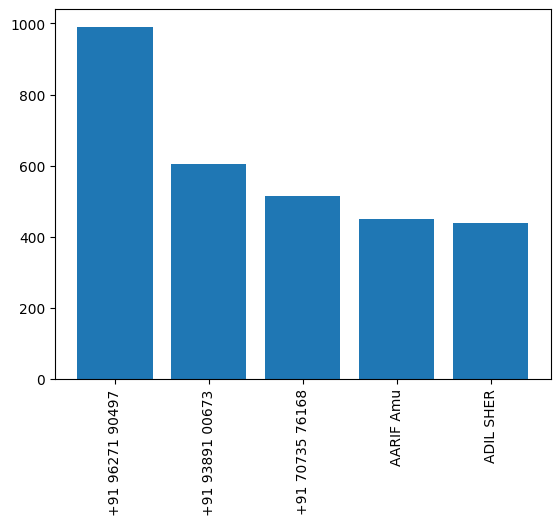

In [42]:
import matplotlib.pyplot as plt
plt.bar(x.index,x.values)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
round((df['Sender'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'Sender':'User','Count':'Percent'})


,User,count
0,+91 96271 90497,9.24
1,+91 93891 00673,5.64
2,+91 70735 76168,4.81
3,AARIF Amu,4.19
4,ADIL SHER,4.10
...,...,...
341,+91 82187 45312,0.01
342,+91 89541 09197,0.01
343,+91 84091 58216,0.01
344,Tanzeel Arshad Amu,0.01


In [44]:
from wordcloud import WordCloud

In [45]:
from collections import Counter
word=[]
for i in df['message']:
    word.extend(i.split())

pd.DataFrame(Counter(word).most_common(20))


,0,1
0,<Media,2271
1,omitted>,2271
2,hai,1215
3,was,992
4,message,984
5,This,799
6,deleted,784
7,to,773
8,ka,459
9,ke,454


In [46]:
f=open('/Users/anaszhcet2024/Whatsapp-Chat-Analyser/hinglish Stop_words','r')
stop_words=f.read()



In [47]:

words = []
for i in df['message']:
    for word in i.lower().split():
        if word  not in stop_words:
            words.append(word)


pd.DataFrame(Counter(words).most_common(50))


,0,1
0,<media,2271
1,omitted>,2271
2,rcb,108
3,send,90
4,bhej,82
5,year,81
6,baat,81
7,😂,81
8,",",73
9,branch,66


In [48]:
temp=df[df['message']!='<Media omitted>']
f=open('/Users/anaszhcet2024/Whatsapp-Chat-Analyser/hinglish Stop_words','r')
stop_words=f.read()

words = []
for i in temp['message']:
    for word in i.lower().split():
        if word not in stop_words:
            words.append(word)

pd.DataFrame(Counter(words).most_common(20))


,0,1
0,rcb,108
1,send,90
2,bhej,82
3,year,81
4,baat,81
5,😂,81
6,",",73
7,branch,66
8,pass,65
9,tau,64


In [49]:
%pip install emoji


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [51]:
import emoji

df['message']

0                                                        
1                                                        
2                                                        
3                                                        
4                                         <Media omitted>
                               ...                       
10713                                                Nhii
10714                                     <Media omitted>
10715                                      Link hai bhai?
10716        https://scholarships.gov.in/All-Scholarships
10717    Nsp aati to hai nhi up to bhi bhetar hai isse to
Name: message, Length: 10718, dtype: object

In [52]:
Emoji_list=[]
import emoji
for message in df['message']:
    for c in message:
        if emoji.is_emoji(c):
            Emoji_list.append(c)



pd.DataFrame(Counter(Emoji_list).most_common(20))


,0,1
0,😂,307
1,😭,218
2,🤣,112
3,🙏,91
4,🏼,66
5,💀,65
6,😅,62
7,🥲,60
8,👍,58
9,😁,46


In [53]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36
...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4


In [54]:
df['month_num']=df['Date'].dt.month

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/3787995947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_num']=df['Date'].dt.month


In [55]:
a=df['Date'].dt.month
df['month_num']=a

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/1047014174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_num']=a


In [56]:
a = df['Date'].dt.month
df.loc[:, 'month_num'] = a

timeline=df.groupby(['year','month','month_num']).count()['message'].reset_index()
timeline

,year,month,month_num,message
0,2024,August,8,2
1,2024,December,12,608
2,2024,November,11,973
3,2024,October,10,1010
4,2024,September,9,346
5,2025,April,4,1213
6,2025,February,2,1275
7,2025,January,1,540
8,2025,June,6,1122
9,2025,March,3,1287


In [57]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

timeline['time']=time

In [58]:
timeline

,year,month,month_num,message,time
0,2024,August,8,2,August-2024
1,2024,December,12,608,December-2024
2,2024,November,11,973,November-2024
3,2024,October,10,1010,October-2024
4,2024,September,9,346,September-2024
5,2025,April,4,1213,April-2025
6,2025,February,2,1275,February-2025
7,2025,January,1,540,January-2025
8,2025,June,6,1122,June-2025
9,2025,March,3,1287,March-2025


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'August-2024'),
  Text(1, 0, 'December-2024'),
  Text(2, 0, 'November-2024'),
  Text(3, 0, 'October-2024'),
  Text(4, 0, 'September-2024'),
  Text(5, 0, 'April-2025'),
  Text(6, 0, 'February-2025'),
  Text(7, 0, 'January-2025'),
  Text(8, 0, 'June-2025'),
  Text(9, 0, 'March-2025'),
  Text(10, 0, 'May-2025')])

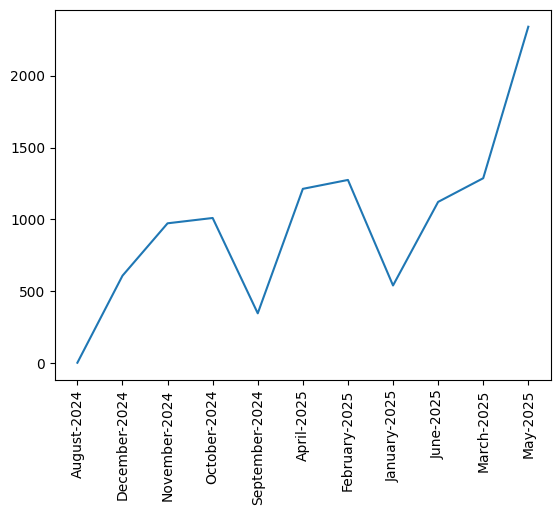

In [59]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [60]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute,month_num
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47,9
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39,9
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36,9
...,...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58,6
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23,6
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3,6
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4,6


In [61]:
a = df['Date'].dt.month
df.loc[:, 'month_num'] = a

In [62]:
b=df['Date'].dt.date
df.loc[:,'only_date']=b

/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/4135179206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'only_date']=b


In [63]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute,month_num,only_date
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47,9,2024-09-20
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39,9,2024-09-20
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36,9,2024-09-20
...,...,...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58,6,2025-06-25
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23,6,2025-06-25
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3,6,2025-06-25
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4,6,2025-06-25


In [64]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2024-08-27,2
1,2024-09-20,20
2,2024-09-21,27
3,2024-09-22,34
4,2024-09-23,26
...,...,...
267,2025-06-20,4
268,2025-06-21,18
269,2025-06-23,28
270,2025-06-24,25


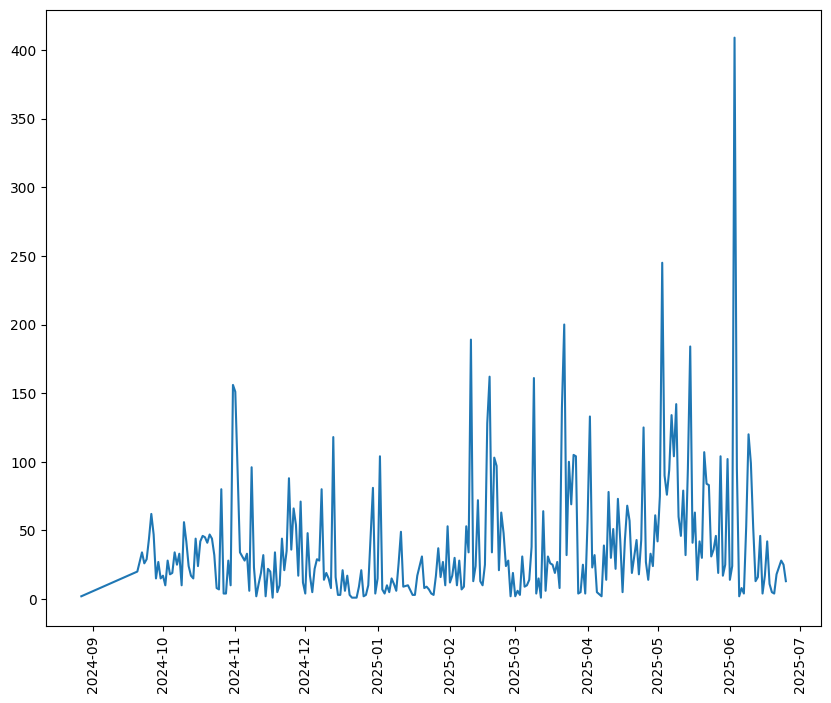

In [65]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [66]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute,month_num,only_date
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47,9,2024-09-20
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39,9,2024-09-20
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36,9,2024-09-20
...,...,...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58,6,2025-06-25
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23,6,2025-06-25
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3,6,2025-06-25
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4,6,2025-06-25


In [75]:
c=df['Date'].dt.day_name()
df.loc[:,'Day_name']=c


/var/folders/wj/cw639tls5439v9_bhl6_fzq80000gn/T/ipykernel_13937/3442146205.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Friday' 'Tuesday' 'Tuesday' ... 'Wednesday' 'Wednesday' 'Wednesday']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Day_name']=c


In [80]:
# b=df['Date'].dt.date
# df.loc[:,'only_date']=b

c=df['Date'].dt.day_name()
df.loc[:,'Day_name']=c
df['Day_name'].value_counts().reset_index().rename(columns={'count':'messages'})

,Day_name,messages
0,Friday,1737
1,Tuesday,1733
2,Thursday,1608
3,Monday,1535
4,Saturday,1509
5,Wednesday,1466
6,Sunday,1130


In [71]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute,month_num,only_date,Day_name
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47,9,2024-09-20,NaN
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27,NaN
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27,NaN
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39,9,2024-09-20,NaN
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36,9,2024-09-20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58,6,2025-06-25,NaN
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23,6,2025-06-25,NaN
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3,6,2025-06-25,NaN
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4,6,2025-06-25,NaN


In [73]:
df['Day_name']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10713   NaN
10714   NaN
10715   NaN
10716   NaN
10717   NaN
Name: Day_name, Length: 10718, dtype: float64

In [81]:
df

,message,Sender,date,Date,year,month,day,Hour,Minute,month_num,only_date,Day_name
0,,,"20/09/2024, 19:47",2024-09-20 19:47:00,2024,September,20,19,47,9,2024-09-20,Friday
1,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27,Tuesday
2,,,"27/08/2024, 22:27",2024-08-27 22:27:00,2024,August,27,22,27,8,2024-08-27,Tuesday
3,,,"20/09/2024, 13:39",2024-09-20 13:39:00,2024,September,20,13,39,9,2024-09-20,Friday
4,<Media omitted>,+91 84399 14759,"20/09/2024, 19:36",2024-09-20 19:36:00,2024,September,20,19,36,9,2024-09-20,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,Nhii,+91 63954 58958,"25/06/2025, 12:58",2025-06-25 12:58:00,2025,June,25,12,58,6,2025-06-25,Wednesday
10714,<Media omitted>,+91 63880 78364,"25/06/2025, 14:23",2025-06-25 14:23:00,2025,June,25,14,23,6,2025-06-25,Wednesday
10715,Link hai bhai?,AARIF Amu,"25/06/2025, 15:03",2025-06-25 15:03:00,2025,June,25,15,3,6,2025-06-25,Wednesday
10716,https://scholarships.gov.in/All-Scholarships,+91 63880 78364,"25/06/2025, 15:04",2025-06-25 15:04:00,2025,June,25,15,4,6,2025-06-25,Wednesday


In [82]:
df['month'].value_counts()

month
May          2342
March        1287
February     1275
April        1213
June         1122
October      1010
November      973
December      608
January       540
September     346
August          2
Name: count, dtype: int64